# CTR Prediction of an Email Campaign

<hr>
Can you predict the Click Through Rate (CTR) of an email campaign?<br><hr>


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
%matplotlib inline


# Reading Train and Test dataset 

In [2]:
train=pd.read_csv('train_F3fUq2S.csv')

In [3]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
train.shape

(1888, 22)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [6]:
train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


By analysing above statistics we found that 'is_timer' column have only '0' value so we can drop this column.

In [7]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

There is no missing values in the data set.

In [8]:
train['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [9]:
train['is_timer'].unique()

array([0], dtype=int64)

# One Hot Encoding

In [10]:
final_dataset=pd.get_dummies(train,drop_first=True)

In [11]:
final_dataset.drop(['campaign_id','is_timer'],axis=1,inplace=True)
final_dataset.dropna()
final_dataset.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,times_of_day_Morning,times_of_day_Noon
0,3,76,10439,39,5,1,6,26,3,29,...,0,0,0,0,0,0,14,0.103079,0,1
1,3,54,2570,256,5,1,2,11,0,22,...,0,0,0,0,0,0,10,0.700000,1,0
2,3,59,12801,16,5,1,2,11,3,23,...,0,1,0,0,0,0,16,0.002769,0,1
3,3,74,11037,30,4,0,15,9,4,24,...,0,0,0,0,0,0,10,0.010868,0,0
4,3,80,10011,27,5,1,6,26,3,31,...,0,1,0,0,0,0,14,0.142826,0,1


# Correlation Matrix

In [12]:
final_dataset.corr()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,...,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,times_of_day_Morning,times_of_day_Noon
sender,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,...,0.147959,0.020928,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398,0.029973,0.018684
subject_len,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,...,-0.293446,0.120273,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143,-0.071913,0.048537
body_len,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,...,-0.220696,0.184035,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866,-0.025787,0.121477
mean_paragraph_len,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,...,0.162480,-0.096086,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042,0.087961,-0.061786
day_of_week,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,...,-0.069705,-0.032476,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372,0.160453,0.117133
is_weekend,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,...,-0.065130,-0.033968,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138,0.225921,0.133220
category,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,...,0.132441,-0.101411,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756,-0.003131,-0.192685
product,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,...,0.047566,-0.104653,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602,-0.008672,0.062886
no_of_CTA,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,...,-0.145453,0.092320,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637,0.002502,0.075819
mean_CTA_len,0.016604,0.144261,0.083468,0.064632,-0.003614,-0.032421,0.127554,0.043223,0.170387,1.000000,...,-0.123560,0.023271,0.032827,0.029194,0.013934,0.100071,0.007170,-0.031162,-0.021281,0.005031


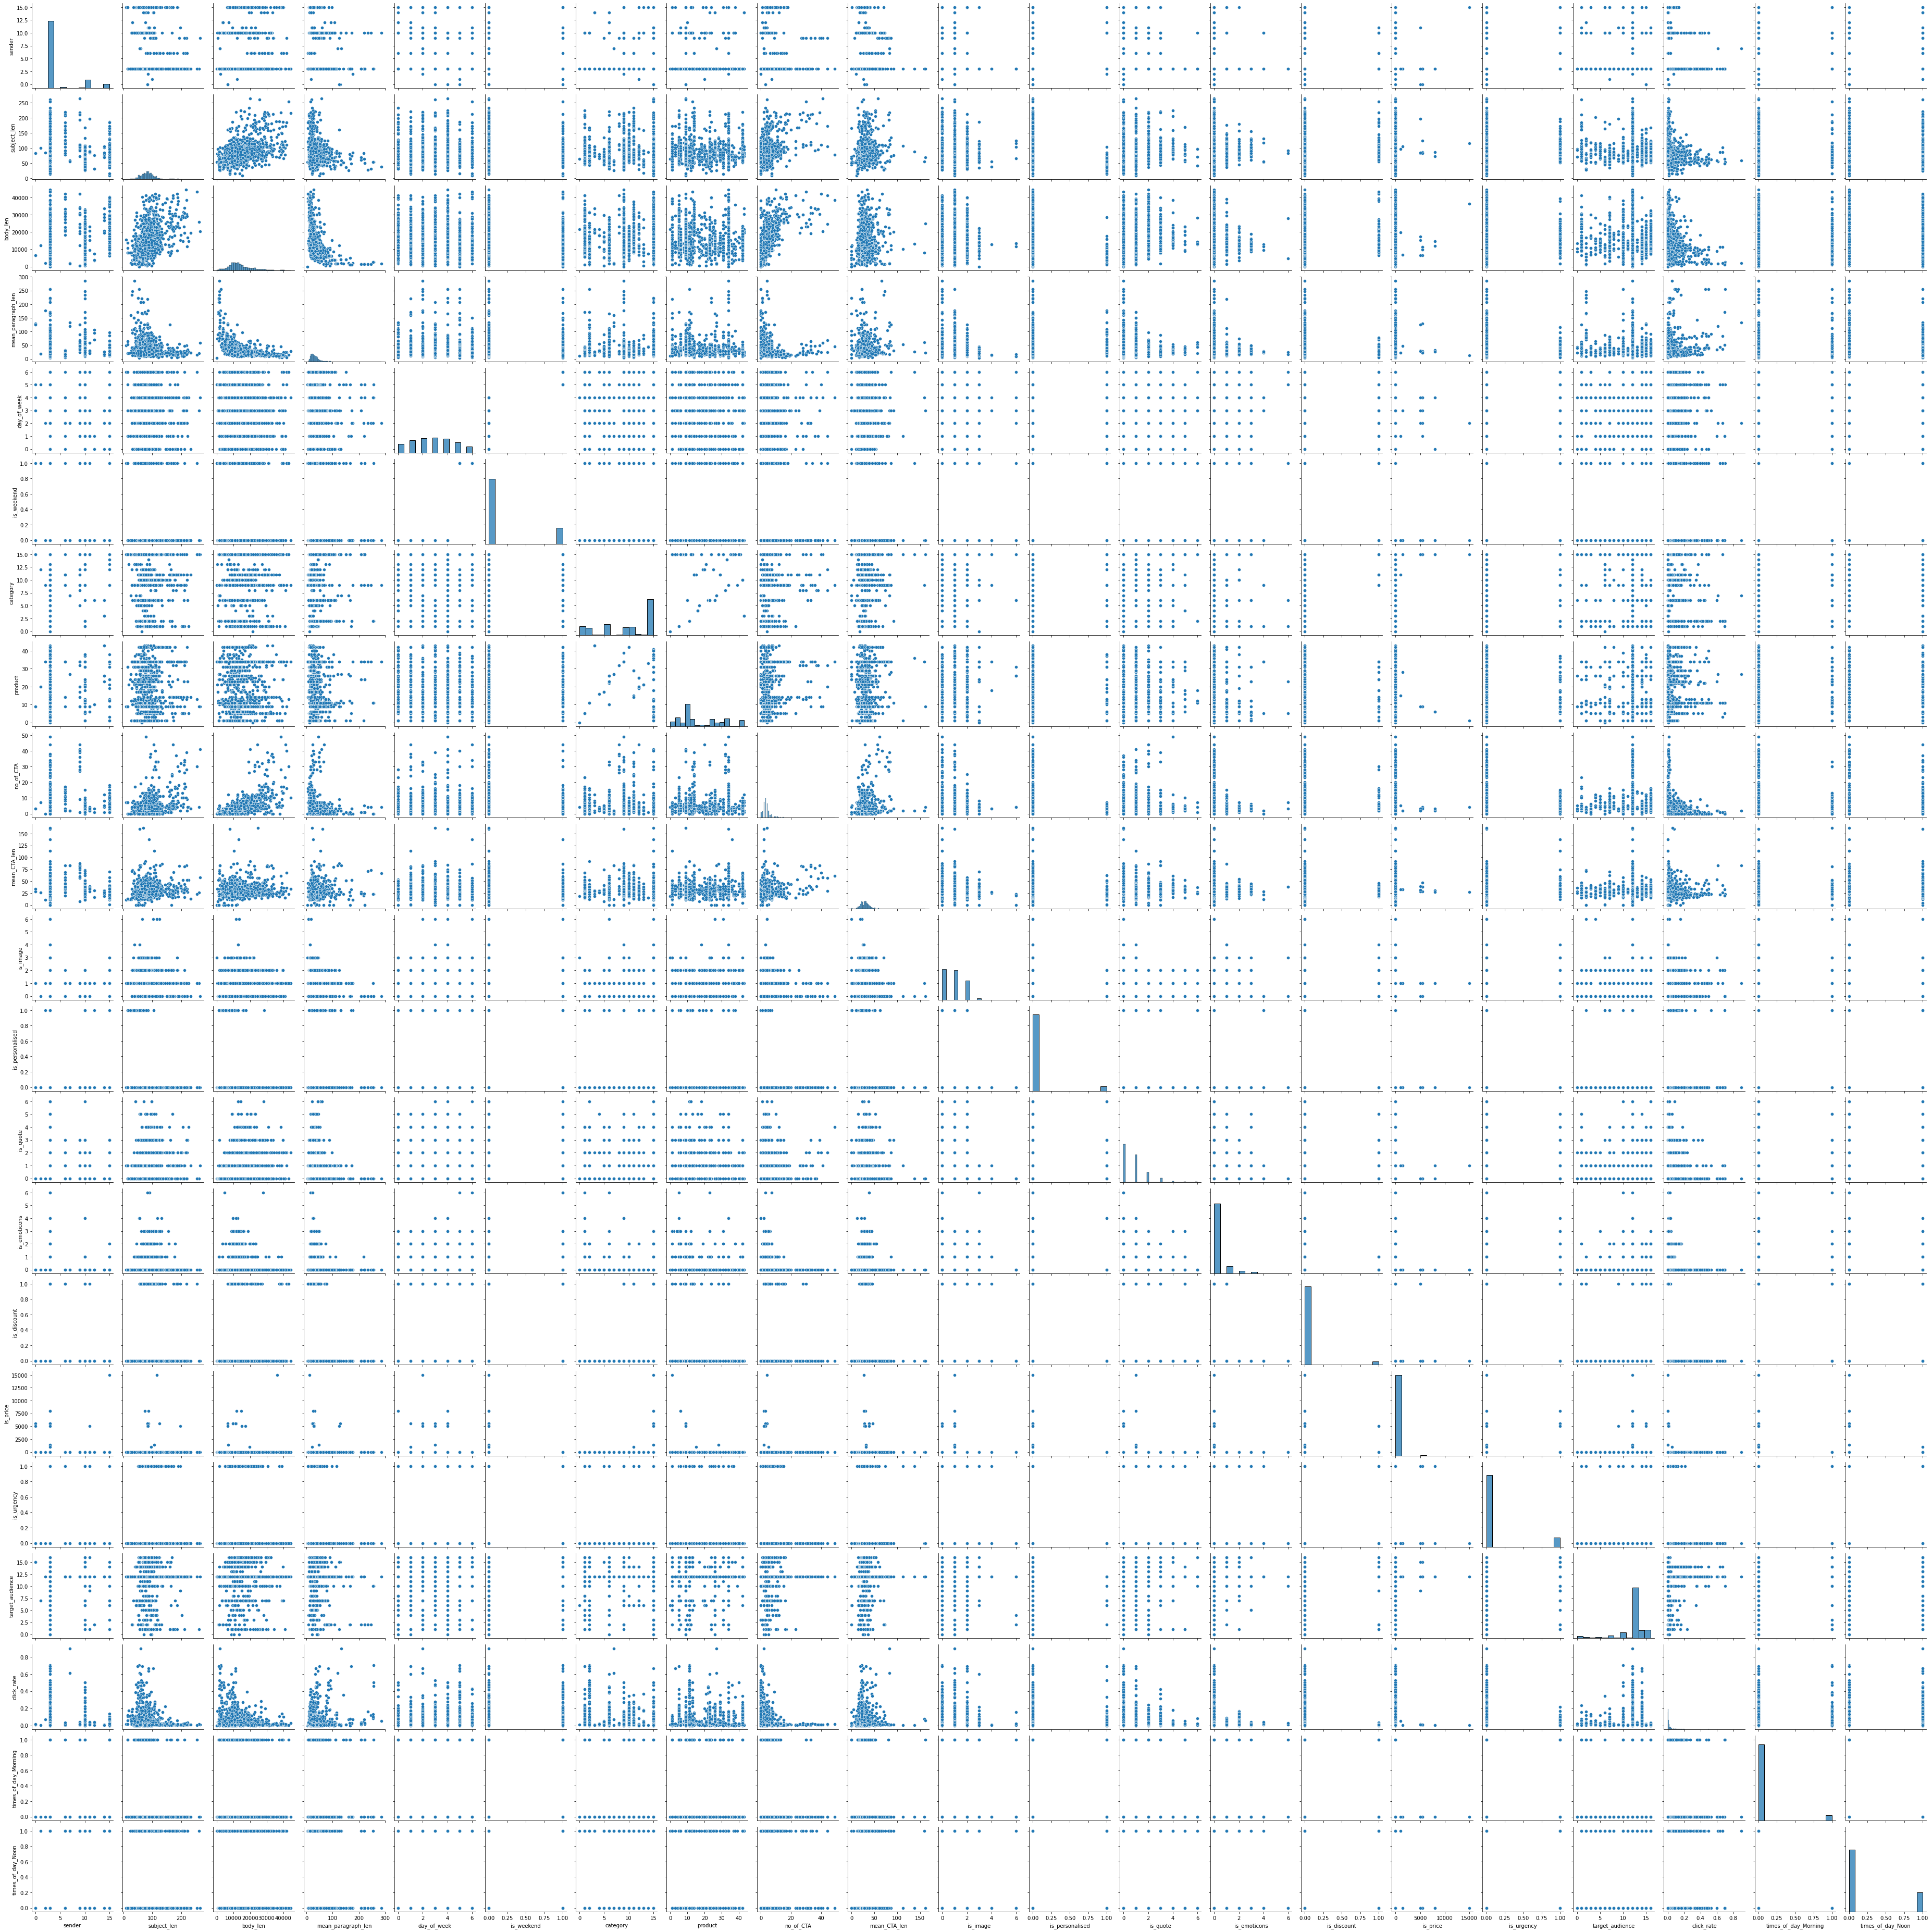

In [13]:
sns.pairplot(final_dataset)

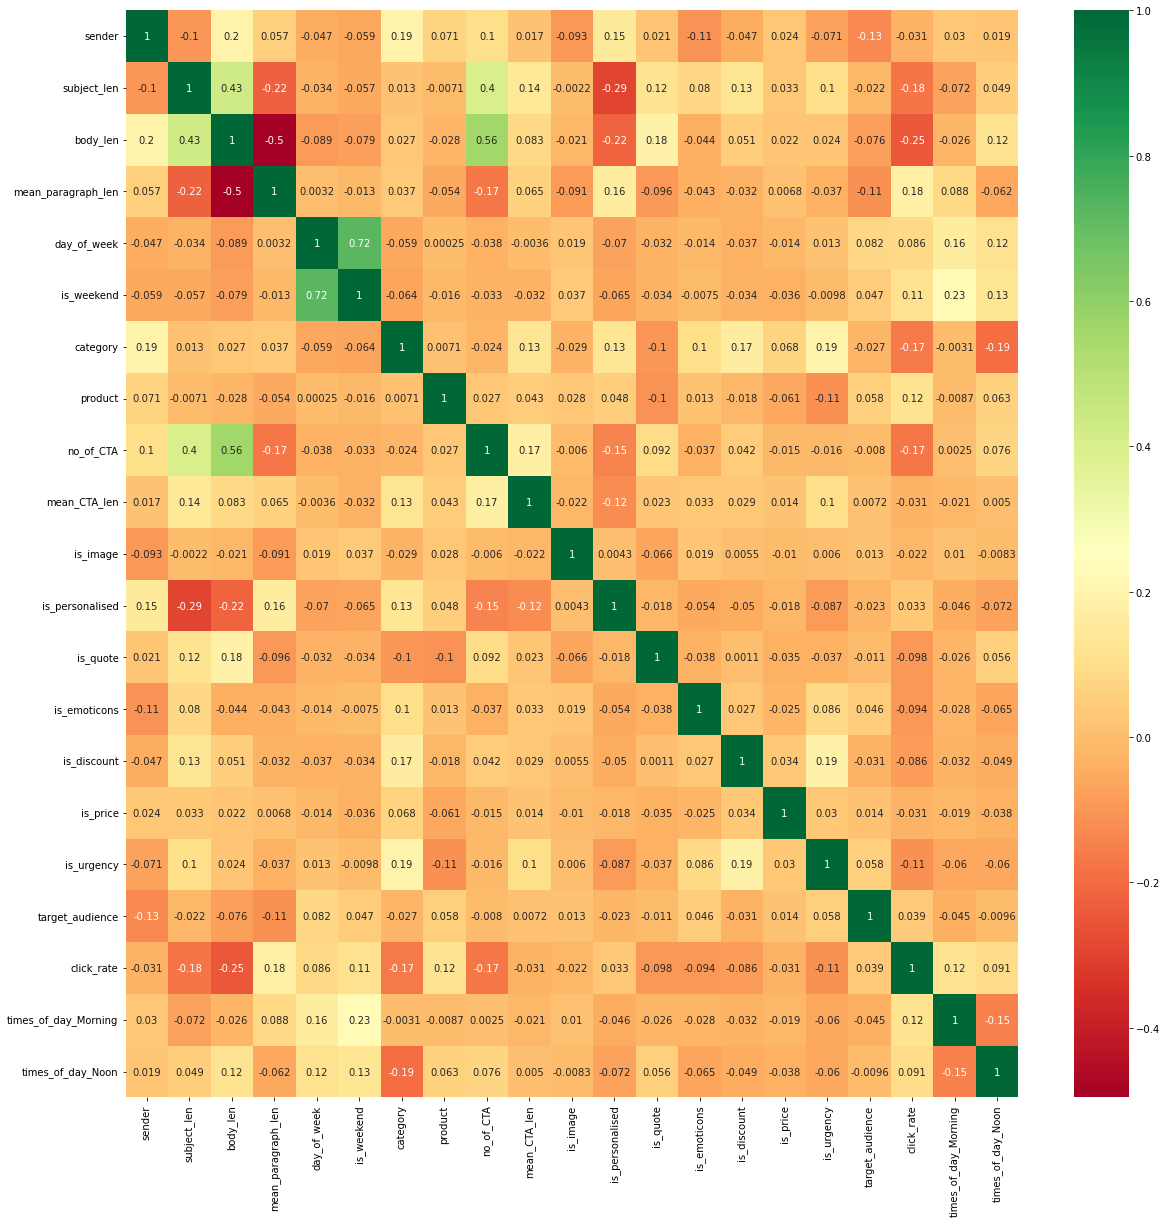

In [14]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Preprocessing of Test Data

In [15]:
# Read test data
test=pd.read_csv('test_Bk2wfZ3.csv')
test.drop(['campaign_id','is_timer'],axis=1,inplace=True)
test=pd.get_dummies(test,drop_first=True)

In [16]:
test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon
0,3,61,12871,11,6,1,6,26,3,37,1,0,0,1,0,0,0,14,0,1
1,3,54,2569,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10,1,0
2,3,88,1473,78,4,0,2,11,0,22,1,0,1,0,0,0,0,10,0,0
3,3,88,1473,78,3,0,2,11,0,22,1,0,1,0,0,0,0,10,0,0
4,3,78,9020,29,3,0,6,26,2,40,0,0,0,0,0,0,0,14,0,1


# Isolate Label and Predictors

In [17]:
y=final_dataset['click_rate']

In [18]:
final_dataset.drop(['click_rate'],axis=1,inplace=True)

In [19]:
X=final_dataset
X.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,times_of_day_Morning,times_of_day_Noon
0,3,76,10439,39,5,1,6,26,3,29,0,0,0,0,0,0,0,14,0,1
1,3,54,2570,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10,1,0
2,3,59,12801,16,5,1,2,11,3,23,1,0,1,0,0,0,0,16,0,1
3,3,74,11037,30,4,0,15,9,4,24,0,0,0,0,0,0,0,10,0,0
4,3,80,10011,27,5,1,6,26,3,31,0,0,1,0,0,0,0,14,0,1


# Model Building

In [20]:
#create lightgbm dataset
msk = np.random.rand(len(X)) < 0.8
lgb_train = lgb.Dataset(X[msk], y[msk])
lgb_eval = lgb.Dataset(X[~msk], y[~msk], reference=lgb_train)

In [21]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'regression',
    'metric': 'l2' ,
    'num_leaves': 31, # default leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    #'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    #'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's l2: 0.00759676
Training until validation scores don't improve for 500 rounds
[2]	valid_0's l2: 0.00730835
[3]	valid_0's l2: 0.0070234
[4]	valid_0's l2: 0.00675538
[5]	valid_0's l2: 0.00654736
[6]	valid_0's l2: 0.0063754
[7]	valid_0's l2: 0.00619854
[8]	valid_0's l2: 0.00603794
[9]	valid_0's l2: 0.00588648
[10]	valid_0's l2: 0.0057413
[11]	valid_0's l2: 0.0056609
[12]	valid_0's l2: 0.00562477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[13]	valid_0's l2: 0.00552014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[14]	valid_0's l2: 0.00544609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[15]	valid_0's l2: 0.00537183
[LightGBM] [Warning] No furth

C:\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's l2: 0.00374558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[383]	valid_0's l2: 0.00374821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[384]	valid_0's l2: 0.00374427
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[385]	valid_0's l2: 0.00373746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[386]	valid_0's l2: 0.00373271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's l2: 0.00373376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_0's l2: 0.0037324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's l2: 0.00372005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[390]	valid_0's l2: 0.00371938
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[766]	valid_0's l2: 0.00361834
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[767]	valid_0's l2: 0.0036198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[768]	valid_0's l2: 0.00362095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[769]	valid_0's l2: 0.00361939
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[770]	valid_0's l2: 0.00361999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[771]	valid_0's l2: 0.00362416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[772]	valid_0's l2: 0.00362288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[773]	valid_0's l2: 0.0036264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[774]	valid_0's l2: 0.00362432
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1172]	valid_0's l2: 0.00360212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1173]	valid_0's l2: 0.00360081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1174]	valid_0's l2: 0.00360358
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1175]	valid_0's l2: 0.00360361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1176]	valid_0's l2: 0.0036018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1177]	valid_0's l2: 0.00360291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1178]	valid_0's l2: 0.00360166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1179]	valid_0's l2: 0.00360119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1180]	valid_0's l2: 0.00360195
[LightGBM] [Warning] No further splits

In [22]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('l2', 0.0035715372176764073)])})
946


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='click_rate', ylabel='Density'>

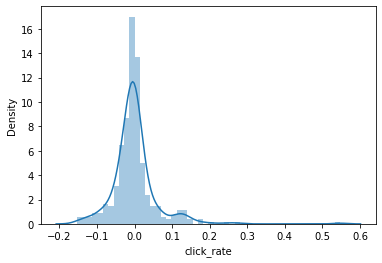

In [23]:
predictions=gbm.predict(X[~msk])
sns.distplot(y[~msk]-predictions)

In [24]:
print('MAE:', metrics.mean_absolute_error(y[~msk], predictions))
print('MSE:', metrics.mean_squared_error(y[~msk], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y[~msk], predictions)))
print('r2_score:', metrics.r2_score(y[~msk], predictions))#.0.52236 on leaderboard gbdt
#0.617 goss


MAE: 0.03518904676113025
MSE: 0.003571537180754451
RMSE: 0.05976233915062605
r2_score: 0.5477454898806389


# Saving The Model

In [25]:
# open a file, where you ant to store the data
file = open('lightgbm_regression_goss_model.pkl', 'wb')

# dump information to that file
pickle.dump(gbm, file)

In [26]:
# submission file
submission=pd.read_csv('sample_submission_LJ2N3ZQ.csv')

In [27]:
submission.head()

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454


# Prediction on Test data

In [28]:
predictions=gbm.predict(test)

In [29]:
submission['click_rate']=predictions

In [30]:
submission.to_csv('lightgbm_goss.csv',header=True,index=False)